<div dir="rtl" lang="he" xml:lang="he">
<font size=6> עיבוד נתונים - מעבדה א'</font>

<font size=5> מחברת colab גנרית</font>

---
מחברת זו הינה template לעיבוד נתונים במסגרת הקורס מעבדה א'. מצורפים הסברים לכל מקטעי הקוד, ולינקים עם הרחבות למעוניינים. אנו מקווים שהיא תשמש אתכם נאמנה, ותקנה לכם כלים לעיבוד וניתוח נתונים מדעי, אולי גם מחוץ לכותלי הקורס.

כמה הנחיות לשימוש:
המחברת מחולקת למספר פרקים, רצוי להריץ את הבלוקים לפי הסדר (שכן לרוב הם מבוססים אחד על קודמיו). עליכם לשנות את הקוד אך ורק   במקומות המסומנים באמצעות הערה, כלומר ` comment #` .

אנו זמינים לשאלות, ופתוחים להצעות לשיפור!

בהצלחה רבה!

צוות המעבדה

---
<h1>
<font size=5><b>1. ייבוא חבילות</b></font>
</h1>

תחילה, נייבא מספר חבילות פייתון  (Python packages) בהן נשתמש בתהליך עיבוד הנתונים.

החבילה Numpy משמשת בעיקר  לביצוע ביעילות פעולות על מערכים,
 ואילו SciPy, אשר מתבסס על NumPy, מציע פונקציונליות נוספת לאופטימיזציה, וכו'.
החבילה Pandas חיונית לניתוח נתונים, מספקת מבני נתונים גמישים ושימושיים כמו DataFrames ומאפשרת ביצוע מניפולציות על הדאטא.

---






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.odr import Model, ODR, RealData

<div dir="rtl" lang="he" xml:lang="he">

---
<h1>
<font size=5><b>2. קריאת קבצי CSV</b></font>
</h1>

 כדי לייבא את נתוני הניסוי מתוך קובץ הCSV למחברת זו, יש להמיר את הדאטא לייצוג קריא ונוח חישובית. במחברת זו נייצג את הנתונים בתור אובייקט  DataFrames. נדפיס כאן לפניכם את 5 השורות הראשונות.

 הערה: וודאו שאתם אכן מעלים את קובץ הנתונים שלכם לתיקיה הראשית ("content/"), ע"י גרירת הקובץ למקום המתאים.
 כמו כן וודאו שהעמודות מכילות כותרות.

---

In [2]:
file_path = r"/Users/eliehabib/Desktop/school/Lab/Reports/Lab-Reports/Thermo-couple/temp.xlsx" # Replace with your file path: r"/content/<your file name>.xlsx"
sheet_number = 0 # Replace with your sheet number (1st sheet = 0)
data = pd.read_excel(file_path, sheet_name=sheet_number)
data[:5]

,t[sec],Δt,T,Delta T
0,0,0.29,80.192,0.054
1,60,0.29,79.583,0.054
2,120,0.29,79.200,0.054
3,180,0.29,78.625,0.054
4,240,0.29,78.242,0.054


<div dir="rtl" lang="he" xml:lang="he">

---
<h1>
<font size=5><b>3. בחירת x, $\Delta$x, y, $\Delta$y </b></font>
</h1>

כעת, נבחר את העמודות המתאימות מתוך הנתונים, לשם ביצוע ההתאמה. ניתן לבחור את העמודות לפי שם (השורה הראשונה בעמודה) או לחילופין לפי האינדקס של העמודה (0, 1, 2...). שוב, נדפיס את השורות הראשונות מתוך העמודות שנבחרו.

---

In [3]:
def choose_columns(columns):
    x = data.iloc[:,columns[0]]
    delta_x = data.iloc[:,columns[1]]
    y = data.iloc[:,columns[2]]
    delta_y = data.iloc[:,columns[3]]
    return x, delta_x, y, delta_y

<div dir="rtl" lang="he" xml:lang="he">

---
<h1>
<font size=5><b>4. התאמה לנתונים</b></font>
</h1>

נשתמש באלגוריתם ODR (או Orthogonal Distance Regression) לביצוע ההתאמה. אלגוריתם זה מתאים במקרה של תלות בין משתנים. בניגוד לבעיית המינימיזציה הסטנדרטית בשארים הפחותים, שם ההתחיסות הינה רק למרחק האנכי בין נקודות הדאטא וקו ההתאמה, ODR מבצע מינימיזציה ביחס למרחק האורתוגונלי, מה שמטייב את ההתאמה.
מתודת ODR מתוך הספריה SciPy מצריך הגדרת פונקציית התאמה ומתן ניחושים התחלתיים לפרמטרים. ראו להלן מספר פונקציות התאמה שימושיות, לדוגמא.

---

In [4]:
def function(A, x):
    pass # Define your function. See some examples below.

def linear(A, x):
    return A[1] * x + A[0]

def parabolic(A, x):
    return A[3] * x**3 + A[2] * x**2 + A[1] * x + A[0]

def optics(A, x):
    return A[1] * x / (x - A[1]) + A[0]

def exponential(A, x):
    return A[2] * np.exp(A[1] * x) + A[0]

def sinusoidal(A, x):
    return A[3] * np.sin(A[1] * x + A[2]) + A[0]
def cooling_fit(A, x):
    return A[0] + A[1]*np.exp(-A[2]*x)

<div dir="rtl" lang="he" xml:lang="he">
 תוכלו להתנסות בבחירת פונקציות התאמה שונות וניחושים התחלתיים שונים:

<div dir="rtl" lang="he" xml:lang="he">
 כעת, נבצע התאמה לנתונים לפי המודל הפונקציונלי הנבחר, באמצעות אלגוריתם ODR:

In [5]:
def odr_fit(fit_func, initial_guesses, x, delta_x, y, delta_y):
    model = Model(fit_func)
    odr_data = RealData(x, y, sx=delta_x, sy=delta_y)
    odr = ODR(data=odr_data, model=model, beta0=initial_guesses)
    output = odr.run()

    fit_params = output.beta
    fit_params_error = output.sd_beta
    fit_cov = output.cov_beta
    return fit_params, fit_params_error, fit_cov, output

<div dir="rtl" lang="he" xml:lang="he">

ננתח את הפלט של אלגוריתם ODR:

1. `fit_params`:

הפרמטרים המשוערים של המודל. אלו הם הערכים האופטימליים של הפרמטרים, המתאימים ביותר לנתונים לפי אלגוריתם ODR. הפרמטרים ניתנים לפי אינדקס בסדר עולה: $a_0,a_1,a_2,...$
2. `fit_params_error`:

השגיאה של הפרמטרים המשוערים. ערכים אלו מצביעים על אי הוודאות או השונות באומדני הפרמטרים. שגיאות הפרמטרים ניתנות לפי אינדקס בסדר עולה: $\Delta a_0,\Delta a_1,\Delta a_2,...$
3. `fit_cov`:

מטריצת השונות של הפרמטרים המשוערים. מטריצה ​​זו מספקת מידע על הקורלציה בין צמדי פרמטרים והשונות המשותפת שלהם:

\begin{bmatrix}
\text{Cov}(a_0, a_0) & \text{Cov}(a_0, a_1) & \text{Cov}(a_0, \dots) \\
\text{Cov}(a_1, a_0) & \text{Cov}(a_1, a_1) & \text{Cov}(a_1, \dots) \\
\text{Cov}(\dots, a_0) & \text{Cov}(\dots, a_1) & \text{Cov}(\dots, \dots)
\end{bmatrix}

<div dir="rtl" lang="he" xml:lang="he">

---
<h1>
<font size=5><b>5. חישוב השארים והמדדים הסטטיסטיים</b></font>
</h1>

נחשב את ערכי השארים (residuals) ואת $\chi^2_{red}, p-value$, באופן מפורש.

---

In [6]:
def calc_stats(x, y, fit_params, output):
    residuals = y - fit_func(fit_params, x)
    degrees_of_freedom = len(x) - len(fit_params)
    chi2 = output.sum_square
    chi2_red = chi2/degrees_of_freedom
    p_val = stats.chi2.sf(chi2, degrees_of_freedom)
    return residuals, degrees_of_freedom, chi2_red, p_val

<div dir="rtl" lang="he" xml:lang="he">

נסביר את משמעות הערכים שהדפסנו:

1. `residuals`:

שארים מתארים את ההפרש בין ערכי הנתונים והערכים החזויים מהמודל. הם מציינים עד כמה המודל מתאים לכל נקודת נתונים בודדת. הפרשים קטנים מעידים על התאמה טובה, ולהיפך.

2. `degrees_of_freedom`:

דרגות חופש (DOF) בהקשר של מודל רגרסיה מתייחס למספר המדידות מהנתונים פחות מספר פרמטרי ההתאמה.

3. `chi2_red`:

חי בריבוע מצומצם ($\chi^2_{red}$) הינו חי בריבוע חלקי מספר דרגות החופש. הוא מספק מדד למידת ההתאמה של המודל לנתונים, תוך התחשבות במספר הפרמטרים המוערכים. ערך קרוב ל-1 מצביע על התאמה טובה, בעוד שערכים גדולים או פחות מ-1 מצביעים על התאמה שאינה מיטבית.
3. `p_val`:

ערך ה-p נגזר מהתפלגות של חי בריבוע ומציין את ההסתברות לקבל ערך חי בריבוע
הקטן בערכו מהערך שקיבלנו מההתאמה, ובמילים אחרות:
$p[\chi^2<\chi^2_{fit}]$.

ערך p בטווח >0.05 או < 0.95 מצביע על כך שהמודל מתאים היטב לנתונים, בעוד שערך p קיצוני, <0.05 או > 0.95 מצביע על כך שהמודל עשוי להיות לא מתאים.


ערכים סטטיסטיים אלה יחד מספקים הערכה מקיפה של התאמת המודל הנבחר לנתונים, ומסייע לבחון את תקפות ההנחות השונות (ביחס לצורה הפונקציונלית של המודל, הערכת השגיאות, וכו...).
    


<div dir="rtl" lang="he" xml:lang="he">

---
<h1>
<font size=5><b>6. הדפסת פרמטרי ההתאמה ושגיאותיהם, והמדדים הסטטיסטיים הרלוונטיים</b></font>
</h1>

---

In [7]:
def print_output(fit_params, fit_params_error, chi2_red, p_val, degrees_of_freedom):
    for i in range(len(fit_params)):
        print(f"a[{i}]: {fit_params[i]} \u00B1 {fit_params_error[i]} ")
    print(f"Chi Squared Reduced = {chi2_red:.5f} ")
    print(f"P-value = {p_val:.5e}")
    # print(f"DOF = {degrees_of_freedom}")

<div dir="rtl" lang="he" xml:lang="he">

כעת, נבצע את כל תהליך ביצוע ההתאמה והחישובים הנלווים, בבת אחת, ע"י קריאה לכל הפונקציות שראינו לעיל. ראשית נבחר את העמודות הרלוונטיות ונשרטט את הדאטא בלבד (אנא עשו בדיקת שפיות: האם זו התצורה שציפיתם לקבל?):

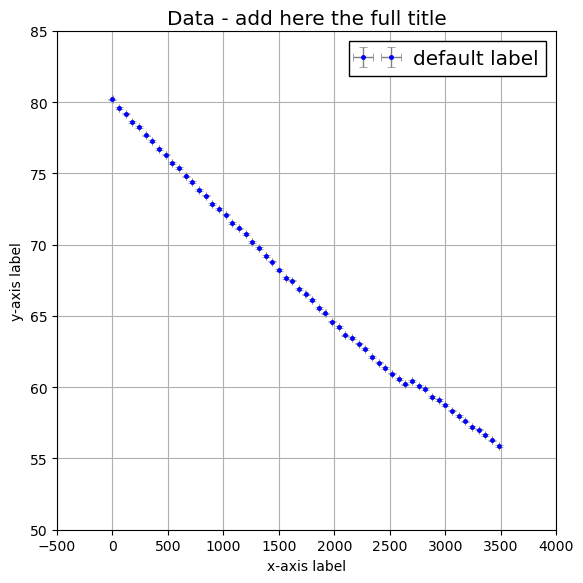

In [8]:
columns = [0, 1, 2, 3] # Define the columns indices to represent x, delta x, y, delta y.
x, delta_x, y, delta_y = choose_columns(columns)

plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.style.use('classic')

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.errorbar(x, y, xerr=delta_x, yerr=delta_y, fmt='.b', label='default label', ecolor='gray') # Change the label


ax.set_title('Data - add here the full title')  # Add here the full title for the fit
ax.set_xlabel('x-axis label') # Change x-axis label
ax.set_ylabel('y-axis label') # Change y-axis label

ax.grid(True)
ax.legend()

ax.ticklabel_format(style='plain', useOffset=False, axis='y')

plt.tight_layout()
plt.show()

In [9]:
fit_func = cooling_fit # Choose your fit function name
initial_guesses = (0, 0, 0.00010500551) # Define the initial guesses for the parameters in list "A" (make sure they are the same length, and in the same order!)
fit_params, fit_params_error, fit_cov, output = odr_fit(fit_func, initial_guesses, x, delta_x, y, delta_y)
residuals, degrees_of_freedom, chi2_red, p_val = calc_stats(x, y, fit_params, output)
print_output(fit_params, fit_params_error, chi2_red, p_val, degrees_of_freedom)

a[0]: 21.811132955840442 ± 2.581061487613869 
a[1]: 58.646230938223766 ± 2.5206502366337724 
a[2]: 0.0001562255889010438 ± 8.93174421787821e-06 
Chi Squared Reduced = 17.20705 
P-value = 1.52539e-165


<div dir="rtl" lang="he" xml:lang="he">
<font size=5 color="red"> אופציונאלי:</font>
נדפיס את הפלט הסטנדרטי המלא, לקבלת מידע מלא יותר על תהליך ביצוע ההתאמה (לפירוט, ראו את הדוקומנטציה).

[דוקומנטציה](https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.Output.html)

In [10]:
output.pprint()

Beta: [2.18111330e+01 5.86462309e+01 1.56225589e-04]
Beta Std Error: [2.58106149e+00 2.52065024e+00 8.93174422e-06]
Beta Covariance: [[ 3.87159790e-01 -3.77971362e-01  1.33629544e-06]
 [-3.77971362e-01  3.69248483e-01 -1.30258393e-06]
 [ 1.33629544e-06 -1.30258393e-06  4.63624203e-12]]
Residual Variance: 17.207051372537087
Inverse Condition #: 7.2972232994231945e-09
Reason(s) for Halting:
  Parameter convergence


<div dir="rtl" lang="he" xml:lang="he">

---
<h1>
<font size=5><b>7. שרטוט גרף הנתונים, פונקציית ההתאמה, וגרף השארים</b></font>
</h1>

נשרטט את ערכי הנתונים ושגיאותיהם (שימו לב שגם השגיאה בציר x משורטטת באיור זה, אם כי בשל מימדיה הקטנים היא לא נראית בבירור בגרף), ואת פונקציית ההתאמה שחישבנו ביחס אליהם, באיור השמאלי, ואילו את גרף השארים באיור הימני. תוכלו לשנות ולהתאים את פסקת הקוד הבאה לצרכיכם ולטעמכם, וכן להוסיף עוד עקומות במידת הנדרש. שימו לב שעליכם לערוך את הכותרות הראשיות לגרפים, כותרות הצירים, ולהוסיף יחידות.

---

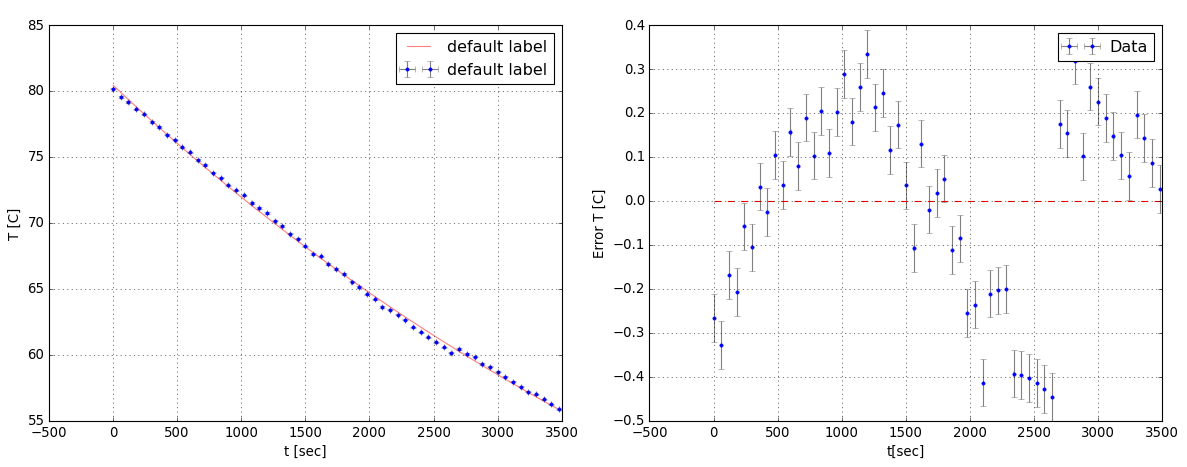

In [11]:
plt.close('all')
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.style.use('classic')

fig.patch.set_facecolor('white')
for ax in axs:
    ax.set_facecolor('white')

x_fit = np.linspace(min(x), max(x), 10*len(x))
y_fit = fit_func(fit_params, x_fit)
axs[0].errorbar(x, y, xerr=delta_x, yerr=delta_y, fmt='.b', label='default label', ecolor='gray') # Change the label
axs[0].plot(x_fit, y_fit, label='default label', c='r', alpha=0.5) # Change the label

# If you want to plot multiple functions, change here the relevant parameters (x, y, xerr, yerr, label). Otherwise, uncomment the 2 next lines:
#axs[0].errorbar(x + 0.2, y + 0.3, xerr=delta_x, yerr=delta_y, fmt='.g', label='Data', ecolor='gray')
#axs[0].plot(x_fit + 0.2, y_fit + 0.3, label='Fit', c='k', alpha=0.5)

axs[0].set_title(' ')  # Add here the full title for the fit
axs[0].set_xlabel('t [sec]') # Change x-axis label if needed
axs[0].set_ylabel('T [C]') # Change y-axis label if needed

axs[0].grid(True)
axs[0].legend()

axs[1].errorbar(x, residuals, xerr=delta_x, yerr=delta_y, fmt='.b', label="Data", ecolor='gray')
axs[1].hlines(0, min(x), max(x), colors='r', linestyles='dashed')

axs[1].set_title('') # Add here the full title for the residuals
axs[1].set_xlabel('t[sec]') # Change column names
axs[1].set_ylabel('Error T [C]') # Change column names if needed

axs[1].grid(True)
axs[1].legend()

for ax in axs:
    ax.get_yaxis().get_major_formatter().set_useOffset(False)


plt.tight_layout()
plt.show()